In [ ]:
import tensorflow as tf

## Inputs of a neural net

### Understanding Tensors and their shapes

In [ ]:
# another matrix
matrix = tf.constant([
                      [
                       [
                       [1,2,4],
                       [1,2,3]
                       ],
                       [
                       [1,2,4],
                       [1,2,3]
                       ]
                      ],
                      [[
                       [1,2,4],
                       [1,2,3]
                       ],
                      [
                       [1,2,4],
                       [1,2,3]
                       ]
                      ]
                    ])
matrix

<tf.Tensor: shape=(2, 2, 2, 3), dtype=int32, numpy=
array([[[[1, 2, 4],
         [1, 2, 3]],

        [[1, 2, 4],
         [1, 2, 3]]],


       [[[1, 2, 4],
         [1, 2, 3]],

        [[1, 2, 4],
         [1, 2, 3]]]], dtype=int32)>

In [ ]:
tf.reshape(matrix,shape=(2,2,2,3,1))

<tf.Tensor: shape=(2, 2, 2, 3, 1), dtype=int32, numpy=
array([[[[[1],
          [2],
          [4]],

         [[1],
          [2],
          [3]]],


        [[[1],
          [2],
          [4]],

         [[1],
          [2],
          [3]]]],



       [[[[1],
          [2],
          [4]],

         [[1],
          [2],
          [3]]],


        [[[1],
          [2],
          [4]],

         [[1],
          [2],
          [3]]]]], dtype=int32)>

In [ ]:
tensor = tf.constant([[0,0,0,1],[0,1,0,0],[0,1,0,0]])

In [ ]:
input = tf.constant([12,3,4])
input

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([12,  3,  4], dtype=int32)>

In [ ]:
input.ndim

1

In [ ]:
from keras.datasets import mnist

In [ ]:
(trainX, trainy), (testX, testy) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
trainy.shape

(60000,)

In [ ]:
trainy[0]

5

In [ ]:
trainX.shape

(60000, 28, 28)

In [ ]:
trainX[0].shape

(28, 28)

In [ ]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))

In [ ]:
trainX.shape

(60000, 28, 28, 1)

In [ ]:
trainX[0].shape

(28, 28, 1)

In [ ]:
rand = tf.random.uniform(shape=(60000,),minval=0,maxval=1)
rand > 0.5

<tf.Tensor: shape=(60000,), dtype=bool, numpy=array([ True, False, False, ..., False,  True, False])>

In [ ]:
trainX[rand > 0.5]

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [ ]:
# Playaround with tensor to understand the input shape of a Dense layer

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


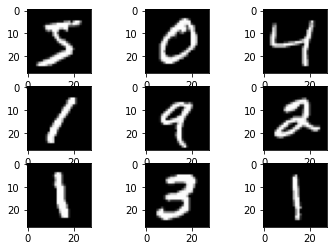

In [ ]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
# # reshape dataset to have a single channel
# trainX = trainX.reshape((trainX.shape[0], 28, 28))
# testX = testX.reshape((testX.shape[0], 28, 28))

In [ ]:
# one hot encode target values
trainY = tf.one_hot(trainy,depth=10)
testY = tf.one_hot(testy,depth=10)

In [ ]:
import keras

In [ ]:
trainX.shape

(60000, 28, 28)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(10, activation='softmax'))
# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_169 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_170 (Dense)            (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
trainX.shape

(60000, 28, 28)

In [ ]:
trainX[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
model.fit(trainX,trainY,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 39.5101 - accuracy: 0.1108
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3020 - accuracy: 0.1118
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3018 - accuracy: 0.1105
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3019 - accuracy: 0.1111
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3019 - accuracy: 0.1115


## Create data for sample regression task

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
X = np.linspace(-10, 10, num = 100)

Y = 4 * X - 3 

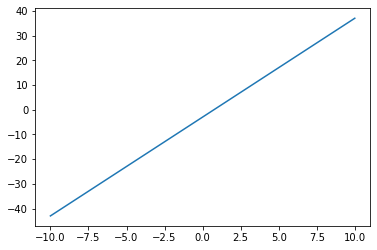

In [ ]:
plt.plot(X,Y)

In [ ]:
# create sample data 
y = Y + tf.random.normal(shape=(len(X),),stddev=2)

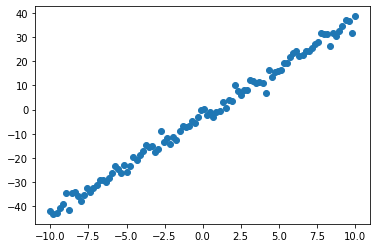

In [ ]:
plt.scatter(X,y)
plt.show()

In [ ]:
X.shape

(100,)

In [ ]:
y.shape

TensorShape([100])

In [ ]:
X = tf.reshape(X,shape=(len(X),1))

In [ ]:
y = tf.reshape(y, shape=(len(y),1))

In [ ]:
print('X shape', X.shape)
print('Y shape', y.shape)

X shape (100, 1)
Y shape (100, 1)


In [ ]:
X[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([-10.])>

## Modelling with Tensorflow

### Create and Compile the Model

In [ ]:
tf.random.set_seed(711)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(1,input_shape=(1,))
    ]
)
# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['mae']
)

### Create train and test splits

In [ ]:
train_size = 0.8
train_examples = int(X.shape[0] * train_size)
train_examples

80

In [ ]:
X_shuffled = tf.random.shuffle(X, seed= 711)
y_shuffled = tf.random.shuffle(y, seed= 711)
X_train, X_test = X_shuffled[:train_examples], X_shuffled[train_examples:]
y_train, y_test = y_shuffled[:train_examples], y_shuffled[train_examples:]
y_train, y_test = y_shuffled[:train_examples], y_shuffled[train_examples:]

### Print the model summary to check the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Train the Model

In [ ]:
# 3. Fit the model
model.fit(X_test,y_test,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 609ms/step - loss: 247.3403 - mae: 13.0944
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 31.5530 - mae: 4.8444
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5999 - mae: 3.2585
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6455 - mae: 2.9937
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1701 - mae: 2.8820
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8340 - mae: 2.8221
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.5212 - mae: 2.7711
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.2211 - mae: 2.7217
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.9325 - mae: 2.6734
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 8.6550 - mae: 2.6261
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - lo

## Model Evaluation

### Visualize Model

In [ ]:
from tensorflow.keras.utils import plot_model

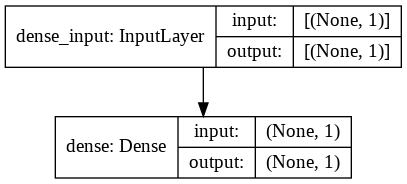

In [ ]:
plot_model(model, show_shapes=True)

### Visualize Model Predictions

In [ ]:
y_pred = model.predict(X_test)

[]

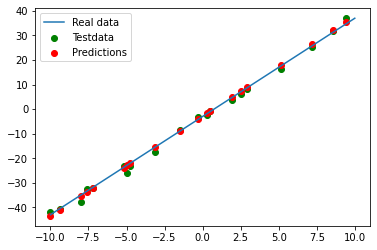

In [ ]:
plt.plot(X,Y, label='Real data')
plt.scatter(X_test,y_test, color='green', label='Testdata')
plt.scatter(X_test,y_pred,color='red',label='Predictions')
plt.legend()
plt.plot()

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 112ms/step - loss: 1.8398 - mae: 1.1444


[1.8398339748382568, 1.1444330215454102]

## Save your model

In [ ]:
# Save the model in SAVE_MODEL format
model.save("linear_regression_model")

INFO:tensorflow:Assets written to: linear_regression_model/assets


In [ ]:
# Save the model in the HDF5 format
model.save("linear_regression_model.hdf5")

## A larger regression example

In [432]:
# Imports
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv", sep=",")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
def categorical_to_numerical(df,col_c, new_label=False, drop=True):
  le = LabelEncoder()
  if ~new_label:
    new_label = col_c + "_encoded"
  col_le = le.fit_transform(df[col_c].values)
  df[new_label] = col_le 
  if drop:
    df.drop(col_c,axis=1,inplace=True)
  return df

In [ ]:
df_le = categorical_to_numerical(df.copy(),'smoker')

In [ ]:
df_le = categorical_to_numerical(df_le,'sex')

In [ ]:
df_encoded = pd.get_dummies(df_le.copy())

In [ ]:
df_encoded.head()

,age,bmi,children,charges,smoker_encoded,sex_encoded,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,0,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   smoker_encoded    1338 non-null   int64  
 5   sex_encoded       1338 non-null   int64  
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [ ]:
# the encoded df that is ready to be passed to a model
df_encoded.describe()

,age,bmi,children,charges,smoker_encoded,sex_encoded,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783,0.505232,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.403694,0.500160,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y = df_encoded.pop('charges')

In [433]:
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded[[col for col in df_encoded.columns if "_" not in col]].copy())
X = np.concatenate((X, df_encoded[[col for col in df_encoded.columns if "_" in col]]), axis=1)

In [434]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

In [435]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [460]:
def get_compiled_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(100,input_shape=(X_train.shape[-1],), activation='relu'))
  model.add(tf.keras.layers.Dense(10,activation='relu'))
  model.add(tf.keras.layers.Dense(1))


  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                loss=tf.keras.losses.mae,
                metrics=['mae'])
  return model

In [461]:
model = get_compiled_model()

In [462]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(X_train,y_train,epochs=250, batch_size=32, callbacks=[callback])

Epoch 1/250
34/34 [==============================] - 0s 2ms/step - loss: 13735.3584 - mae: 13735.3584
Epoch 2/250
34/34 [==============================] - 0s 2ms/step - loss: 13724.1719 - mae: 13724.1719
Epoch 3/250
34/34 [==============================] - 0s 2ms/step - loss: 13644.4531 - mae: 13644.4531
Epoch 4/250
34/34 [==============================] - 0s 2ms/step - loss: 13293.6836 - mae: 13293.6836
Epoch 5/250
34/34 [==============================] - 0s 2ms/step - loss: 12328.6201 - mae: 12328.6201
Epoch 6/250
34/34 [==============================] - 0s 2ms/step - loss: 10607.4531 - mae: 10607.4531
Epoch 7/250
34/34 [==============================] - 0s 2ms/step - loss: 8520.4023 - mae: 8520.4023
Epoch 8/250
34/34 [==============================] - 0s 3ms/step - loss: 7166.6450 - mae: 7166.6450
Epoch 9/250
34/34 [==============================] - 0s 2ms/step - loss: 6654.3438 - mae: 6654.3438
Epoch 10/250
34/34 [==============================] - 0s 3ms/step - loss: 6297.6714 - ma

In [463]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1292.6687 - mae: 1292.6687


[1292.668701171875, 1292.668701171875]

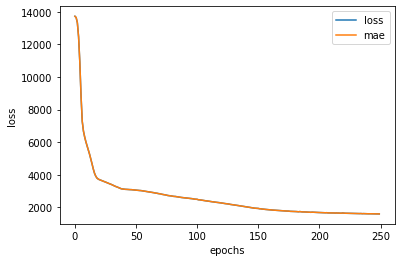

In [455]:
# plot History
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()